In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Достанем таблицу городов России из Википедии (https://ru.wikipedia.org/wiki/Список_городов_России)
wiki = pd.read_html('https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')[0]
wiki.head(3)

Города Российской Федерации                                       \
                            № Герб     Город                Регион   
0                           1  NaN     Абаза               Хакасия   
1                           2  NaN    Абакан               Хакасия   
2                           3  NaN  Абдулино  Оренбургская область   

                                                                               \
  Федеральный округ Население Основание илипервое упоминание Статус города[5]   
0         Сибирский     17111                           1867             1966   
1         Сибирский    165183                           1734             1931   
2       Приволжский     20663                           1795             1923   

                                          
                        Прежние названия  
0  Абаканский Завод, Абаканско-Заводское  
1              Усть-Абаканское (до 1931)  
2                                    NaN

In [4]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   (Города Российской Федерации, №)                               1117 non-null   int64  
 1   (Города Российской Федерации, Герб)                            0 non-null      float64
 2   (Города Российской Федерации, Город)                           1117 non-null   object 
 3   (Города Российской Федерации, Регион)                          1117 non-null   object 
 4   (Города Российской Федерации, Федеральный округ)               1117 non-null   object 
 5   (Города Российской Федерации, Население)                       1117 non-null   object 
 6   (Города Российской Федерации, Основание илипервое упоминание)  1117 non-null   object 
 7   (Города Российской Федерации, Статус города[5])              

In [5]:
# Выберем нужные нам столбцы и переименуем их на англ. лад
cities = wiki['Города Российской Федерации'][['Город', 'Регион', 'Федеральный округ', 'Население', 'Основание илипервое упоминание', 'Статус города[5]']]
cities.columns = ['city', 'region', 'okrug', 'population', 'est_date', 'status_date']
cities.head()

,city,region,okrug,population,est_date,status_date
0,Абаза,Хакасия,Сибирский,17111,1867,1966
1,Абакан,Хакасия,Сибирский,165183,1734,1931
2,Абдулино,Оренбургская область,Приволжский,20663,1795,1923
3,Абинск,Краснодарский край,Южный,34926,1863,1963
4,Агидель,Башкортостан,Приволжский,16365,1980,1991


In [6]:
# В столбце с населением встречаются нецифровые символы
cities[cities.population.str.contains(r'\D')]

,city,region,okrug,population,est_date,status_date
339,Иннополис,Татарстан,Приволжский,96[3],2012,2015
488,Кудрово,Ленинградская область,Северо-Западный,13501[4],1926,2018
492,Кукмор,Татарстан,Приволжский,17700[4],1741,2017
607,Мурино,Ленинградская область,Северо-Западный,19775[4],1676,2019
925,Сунжа,Ингушетия,Северо-Кавказский,64493[3],1845,2016


In [8]:
# Уберём их, а заодно и уберем 'Оспаривается' из названий городов
cities['population'] = cities.population.str.replace('[4]', '', regex=False)
cities['population'] = cities.population.str.replace('[3]', '', regex=False)
cities['city'] = cities.city.str.replace('Оспаривается', '', regex=False)

In [9]:
# В колонке с датой основания встречаются нецифровые символы
cities[cities.est_date.str.contains(r'\D')].est_date.value_counts()

XVIII век                15
XVII век                 14
XVI век                  14
XIV век                   8
XV век                    8
XIX век                   8
XII век                   7
XIII век                  4
1730-е                    2
VIII—IX века              1
1870-е                    1
1378 или 1384             1
XI век                    1
сер. XVIII века           1
XX век                    1
VI век                    1
1380-е                    1
1710-е                    1
VII — VI век до н. э.     1
1920-е                    1
IX-X века                 1
497 год до н. э.          1
VI век до н. э.           1
Name: est_date, dtype: int64

In [10]:
def define_year(x):
    """Функция определения года в целочисленном формате для списка городов из Вики
    
    Содержит некоторые замены строковых дат типа 'XI век' на целые числа типа 1050;
    """
    if x == 'XI век':
        return '1050'
    elif x == 'XII век':
        return '1150'
    elif x == 'XIII век':
        return '1250'
    elif x == 'XIV век':
        return '1350'
    elif x == 'XV век':
        return '1450'
    elif x == 'XVI век':
        return '1550'
    elif x == 'XVII век':
        return '1650'
    elif x == 'XVIII век':
        return '1750'
    elif x == 'XIX век':
        return '1850'
    elif x == 'XX век':
        return '1950'
    elif x == 'IX-X века':
        return '900'
    elif x == 'VIII—IX века':
        return '800'
    elif x == '1378 или 1384':
        return '1378'
    elif x == 'VI век':
        return '550'
    elif x == '1870-е':
        return '1875'
    elif x == 'VII — VI век до н. э.':
        return '-600'
    elif x == 'VI век до н. э.':
        return '-550'
    elif x == '497 год до н. э.':
        return '-497'
    elif x == 'сер. XVIII века':
        return '1750'
    elif x == '1730-е':
        return '1735'
    elif x == '1710-е':
        return '1715'
    elif x == '1920-е':
        return '1925'
    elif x == '1380-е':
        return '1385'
    else:
        return x

In [11]:
# Создадим новый столбец с целочисленным годом основания, который определяется с помощью ф-ии выше
cities['est_year'] = cities.est_date.apply(define_year)
cities[cities.est_year.str.contains(r'\D')]    # Проверим, не осталось ли чего лишнего

,city,region,okrug,population,est_date,status_date,est_year
272,Евпатория,Крым,Южный,105719,497 год до н. э.,1784,-497
395,Керчь,Крым,Южный,147033,VII — VI век до н. э.,NaN,-600
1017,Феодосия,Крым,Южный,69038,VI век до н. э.,NaN,-550


In [12]:
# В столбце с датой статуса города встречаются нецифровые символы
cities.fillna('0', inplace=True)
cities[cities.status_date.str.contains(r'\D')]

,city,region,okrug,population,est_date,status_date,est_year
85,Белогорск,Крым,Южный,16354,XIII век,XIII век,1250
264,Дорогобуж,Смоленская область,Центральный,10720,1150,XIII век,1150
817,Рыльск,Курская область,Центральный,15667,1152,XII век,1152


In [13]:
# Поменяем эти три даты на целочисленные года прямо в столбце
cities['status_date'] = cities.status_date.apply(define_year)
cities[cities.city == 'Белогорск']    # Проверим одну из замен

,city,region,okrug,population,est_date,status_date,est_year
84,Белогорск,Амурская область,Дальневосточный,68220,1860,1926,1860
85,Белогорск,Крым,Южный,16354,XIII век,1250,1250


In [14]:
# переопределим столбцы населения и с годами основания как int
cities['population'] = cities.population.astype('int64')
cities['est_year'] = cities.est_year.astype('int64')
cities['status_date'] = cities.status_date.astype('int64')

In [15]:
# Добавим новый столбец с целочисленным веком, соответствующим дате основания
def define_century(x):
    if x >= 0:
        return x // 100 + 1
    else:
        return x // 100
cities['est_century'] = cities.est_year.apply(define_century)
cities.sort_values('est_century').head(10)

,city,region,okrug,population,est_date,status_date,est_year,est_century
395,Керчь,Крым,Южный,147033,VII — VI век до н. э.,0,-600,-6
1017,Феодосия,Крым,Южный,69038,VI век до н. э.,0,-550,-6
272,Евпатория,Крым,Южный,105719,497 год до н. э.,1784,-497,-5
921,Судак,Крым,Южный,16492,212,0,212,3
246,Дербент,Дагестан,Северо-Кавказский,119961,438,1840,438,5
23,Алушта,Крым,Южный,29078,VI век,1902,550,6
609,Муром,Владимирская область,Центральный,116078,862,862,862,9
808,Ростов,Ярославская область,Центральный,31791,862,862,862,9
875,Смоленск,Смоленская область,Центральный,326863,863,863,863,9
145,Великий Новгород,Новгородская область,Северо-Западный,218724,VIII—IX века,859,800,9


In [16]:
# ОК, датафрейм подготовлен
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1117 non-null   object
 1   region       1117 non-null   object
 2   okrug        1117 non-null   object
 3   population   1117 non-null   int64 
 4   est_date     1117 non-null   object
 5   status_date  1117 non-null   int64 
 6   est_year     1117 non-null   int64 
 7   est_century  1117 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 69.9+ KB


In [17]:
cities.describe()

,population,status_date,est_year,est_century
count,1.117000e+03,1117.000000,1117.000000,1117.000000
mean,8.863345e+04,1847.165622,1689.018800,17.368845
std,4.022194e+05,231.194604,275.978287,2.780828
min,9.600000e+01,0.000000,-600.000000,-6.000000
25%,1.381900e+04,1781.000000,1589.000000,16.000000
50%,2.685000e+04,1938.000000,1750.000000,18.000000
75%,6.007200e+04,1956.000000,1895.000000,19.000000
max,1.151433e+07,2019.000000,2012.000000,21.000000


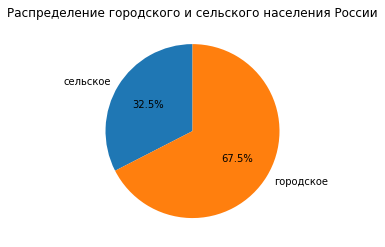

Большая часть населения России живёт в городах
Всего в городах России проживает 99003569 человек


In [274]:
total_ru_population = 146748590
city_population = cities.population.sum()
plt.pie([total_ru_population - city_population, city_population], startangle=90, labels=['сельское', 'городское'],\
       autopct='%1.1f%%')
plt.title('Распределение городского и сельского населения России')
plt.show()
print("Большая часть населения России живёт в городах")
print(f"Всего в городах России проживает {city_population} человек")

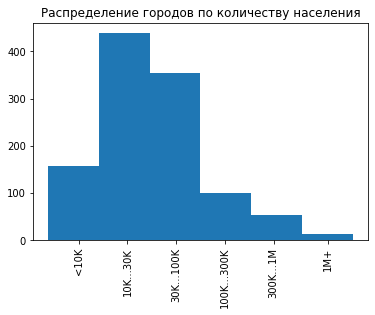

Большая часть городов - небольшого размера, чаще всего в диапазоне от 10 тыс. до 100 тыс. человек


In [275]:
# Разобъём города на 6 корзин по кол-ву населения
bins = [0, 10000, 30000, 100000, 300000, 1000000, np.inf]
labels = ['<10K', '10K...30K', '30K...100K', '100K...300K', '300K...1M', '1M+']
plt.hist(pd.cut(cities.population.sort_values(), bins=bins, labels=labels), bins=6)
plt.title('Распределение городов по количеству населения')
plt.xticks((0.5, 1.3, 2.1, 2.9, 3.7, 4.6), rotation=90)
plt.show()
print("Большая часть городов - небольшого размера, чаще всего в диапазоне от 10 тыс. до 100 тыс. человек")

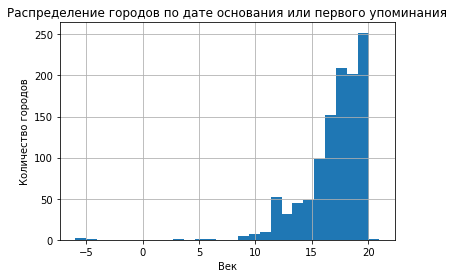

Развитие городов и расширение территории России ускорилось в 16 веке и бурно росло до 19 века.
В 20 веке был финальный аккорд, связанный с ускоренной урбанизацией, которую на данный момент можно считать завершенной.


In [286]:
plt.hist(cities.est_century, bins=28)
plt.title('Распределение городов по дате основания или первого упоминания')
plt.xlabel('Век')
plt.ylabel('Количество городов')
plt.grid()
plt.show()
print("Развитие городов и расширение территории России ускорилось в 16 веке и бурно росло до 19 века.\n\
В 20 веке был финальный аккорд, связанный с ускоренной урбанизацией, которую на данный момент можно считать завершенной.")

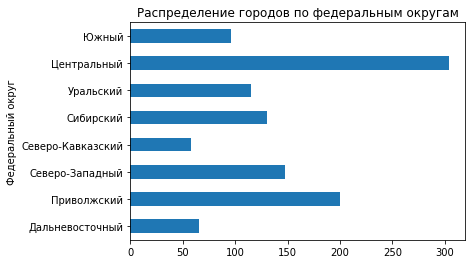

Большая часть городов находится в центре Европейской части страны, включая Поволжье и Северо-Западный округ


In [287]:
cities.groupby('okrug').count().city.plot(kind='barh', title='Распределение городов по федеральным округам')
plt.ylabel('Количество городов')
plt.ylabel('Федеральный округ')
plt.show()
print("Большая часть городов находится в центре Европейской части страны, включая Поволжье и Северо-Западный округ")

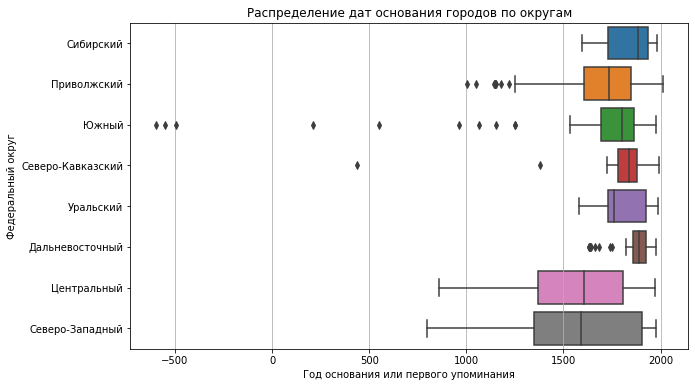

Самые "древние" округа - Центральный и Северо-Западный. 
При этом в Крыму есть несколько городов, основанных ещё древними греками + на Кавказе есть Дербент.
6 самых древних городов: 
           city               est_date
23       Алушта                 VI век
246     Дербент                    438
272   Евпатория       497 год до н. э.
395       Керчь  VII — VI век до н. э.
921       Судак                    212
1017   Феодосия        VI век до н. э.

Самые "молодые" округа - Сибирский и Дальневосточный.
Наконец, в Уральском округе медиана заметно смещена влево, свидетельствуя о бурном развитии поселений в 1-й половине 18 века.


In [314]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='est_year', y='okrug', data=cities)
plt.title('Распределение дат основания городов по округам')
plt.xlabel('Год основания или первого упоминания')
plt.ylabel('Федеральный округ')
plt.grid(axis='x')
plt.show()
print('Самые "древние" округа - Центральный и Северо-Западный. \n\
При этом в Крыму есть несколько городов, основанных ещё древними греками + на Кавказе есть Дербент.')
print(f"6 самых древних городов: \n{cities[['city', 'est_date']][cities.est_year < 800]}\n")
print('Самые "молодые" округа - Сибирский и Дальневосточный.')
print("Наконец, в Уральском округе медиана заметно смещена влево, свидетельствуя о бурном развитии поселений в 1-й половине 18 века.")

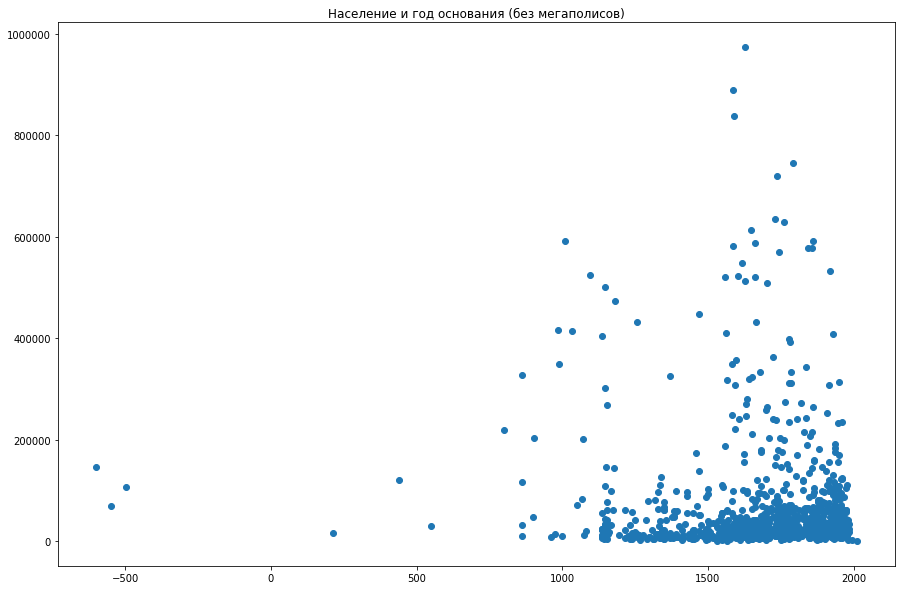

Распределение городов по населению и году основания не позволяет с уверенностью утверждать о связи этих параметров.
Очевидно, численность населения городов гораздо больше зависит от других факторов.


In [310]:
plt.figure(figsize=(15, 10))
cities_normal = cities[cities.population < 1000000]
plt.scatter(cities_normal.est_year, cities_normal.population)
plt.title('Население и год основания (без мегаполисов)')
plt.show()
print("Распределение городов по населению и году основания не позволяет с уверенностью утверждать о связи этих параметров.\
\nОчевидно, численность населения городов гораздо больше зависит от других факторов.")